# **Projet 5 - Segmentez des clients d'un site e-commerce : Notebook simulation**

**Table des matières**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Contexte](#toc1_1_)    
  - 1.2. [Mission](#toc1_2_)    
  - 1.3. [Objectif du notebook](#toc1_3_)    
- 2. [Installation des librairies](#toc2_)    
- 3. [Création des données](#toc3_)    
  - 3.1. [Visualisation](#toc3_1_)    
  - 3.2. [Création de data_init](#toc3_2_)    
- 4. [Feature engineering 1](#toc4_)    
  - 4.1. [Evolution des ARI](#toc4_1_)    
  - 4.2. [Calcul de la fréquence de maintenance](#toc4_2_)    
  - 4.3. [Résultats](#toc4_3_)    
- 5. [Feature enginering 2](#toc5_)    
  - 5.1. [Evolution des ARI](#toc5_1_)    
  - 5.2. [Calcul de la fréquence de maintenance](#toc5_2_)    
  - 5.3. [Résultats](#toc5_3_)    
- 6. [Feature enginering 3](#toc6_)    
  - 6.1. [Evolution des ARI](#toc6_1_)    
  - 6.2. [Calcul de la fréquence de maintenance](#toc6_2_)    
  - 6.3. [Résultats](#toc6_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)
### 1.1. <a id='toc1_1_'></a>[Contexte](#toc0_)

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.  
Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.  
Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.  

### 1.2. <a id='toc1_2_'></a>[Mission](#toc0_)

1. Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.  
La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

2. Une fois le modèle de segmentation choisi, nous souhaiterions que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

### 1.3. <a id='toc1_3_'></a>[Objectif du notebook](#toc0_)

Dans ce Notebook nous verrons : 
- La simulation de l'évolution temporelle du panel de client
- La détermination de la fréquence nécessaire de mise à jour du modèle 

## 2. <a id='toc2_'></a>[Installation des librairies](#toc0_)

In [1]:
# Importation des librairies : 
import matplotlib.pyplot as plt 
import pickle

import fct_projet_5

In [2]:
# Création des chemins de dossier : 
dossier_donnees = '1. Données'
dossier_sauvegarde = '2. Sauvegardes'

## 3. <a id='toc3_'></a>[Création des données](#toc0_)

In [2]:
# Importation des données : 
    
name = 'data'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'rb') as fichier:
    data = pickle.load(fichier)
        
del name, chemin_fichier

In [3]:
# Trie de data par dates : 
data = data.sort_values(by='order_purchase_timestamp', ascending=True)
data

customer_unique_id  customer_zip_code_prefix  \
84693  b7d76e111c89f7ebf14761390f0f7d17                     69309   
70557  4854e9b3feff728c13ee5fc7d1547e92                     99025   
84841  009b0127b727ab0ba422f6d9604487c7                     12244   
90290  0eb1ee9dba87f5b36b4613a65074337c                      2975   
38632  32ea3bdedab835c3aa6cb68ce66565ef                      4106   
...                                 ...                       ...   
75981  9bb92bebd4cb7511e1a02d5e50bc4655                      7176   
75898  634420a0ea42302205032ed44ac7fccc                     27175   
68308  af5454198a97379394cacf676e1e96cb                     11900   
69135  262e1f1e26e92e86375f86840b4ffd63                     64600   
85411  87ab9fec999db8bd5774917de3cdf01c                     18077   

                               order_id order_purchase_timestamp  \
84693  2e7a8482f6fb09756ca50c10d7bfc047      2016-09-04 21:15:19   
70557  e5fa5a7210941f7d56d0208e4e071d35      2016-09-05 00:15:34   
84841  809a282bbd5dbcabb6f2f724fca862ec      2016-09-13 15:24:19   
90290  71303d7e93b399f5bcd537d124c0bcfa      2016-10-02 22:07:52   
38632  3b697a20d9e427646d92567910af6d57      2016-10-03 09:44:50   
...                                 ...                      ...   
75981  392ed9afd714e3c74767d0c4d3e3f477      2018-09-29 09:13:03   
75898  616fa7d4871b87832197b2a137a115d2      2018-10-01 15:30:09   
68308  a2ac6dad85cf8af5b0afb510a240fe8c      2018-10-03 18:55:29   
69135  b059ee4de278302d550a3035c4cdb740      2018-10-16 20:16:02   
85411  10a045cdf6a5650c21e9cfeb60384c16      2018-10-17 17:30:18   

       payment_boleto  payment_credit_card  payment_debit_card  \
84693            0.00               136.23                 0.0   
70557            0.00                75.06                 0.0   
84841            0.00                40.95                 0.0   
90290            0.00               109.34                 0.0   
38632           45.46                 0.00                 0.0   
...               ...                  ...                 ...   
75981            0.00                 0.00                 0.0   
75898            0.00                 0.00                 0.0   
68308            0.00                 0.00                 0.0   
69135            0.00                 0.00                 0.0   
85411            0.00                 0.00                 0.0   

       payment_voucher  payment_total  payment_installments  \
84693             0.00         136.23                     0   
70557             0.00          75.06                     1   
84841             0.00          40.95                     1   
90290             0.00         109.34                     0   
38632             0.00          45.46                     0   
...                ...            ...                   ...   
75981           137.03         137.03                     0   
75898            80.38          80.38                     0   
68308           197.55         197.55                     0   
69135           222.03         222.03                     0   
85411            89.71          89.71                     0   

       number_of_product first_category_product  temps_expedition  \
84693                  2       moveis_decoracao                51   
70557                  1              telefonia                14   
84841                  1        cama_mesa_banho                 6   
90290                  1                  bebes                18   
38632                  1     relogios_presentes                18   
...                  ...                    ...               ...   
75981                  1        cama_mesa_banho                 6   
75898                  1        cama_mesa_banho                 6   
68308                  1        cama_mesa_banho                 6   
69135                  1        cama_mesa_banho                 6   
85411                  1        cama_mesa_banho                 6 

### 3.1. <a id='toc3_1_'></a>[Visualisation](#toc0_)

count                            99437
mean     2017-12-31 08:39:31.094461952
min                2016-09-04 21:15:19
25%                2017-09-12 14:46:19
50%                2018-01-18 23:01:45
75%                2018-05-04 15:30:39
max                2018-10-17 17:30:18
Name: order_purchase_timestamp, dtype: object


----------------------------------------------------------------------------------------------------

date de début de collecte des données : 2016-09-04 21:15:19

date de fin de collecte des données : 2018-10-17 17:30:18

----------------------------------------------------------------------------------------------------



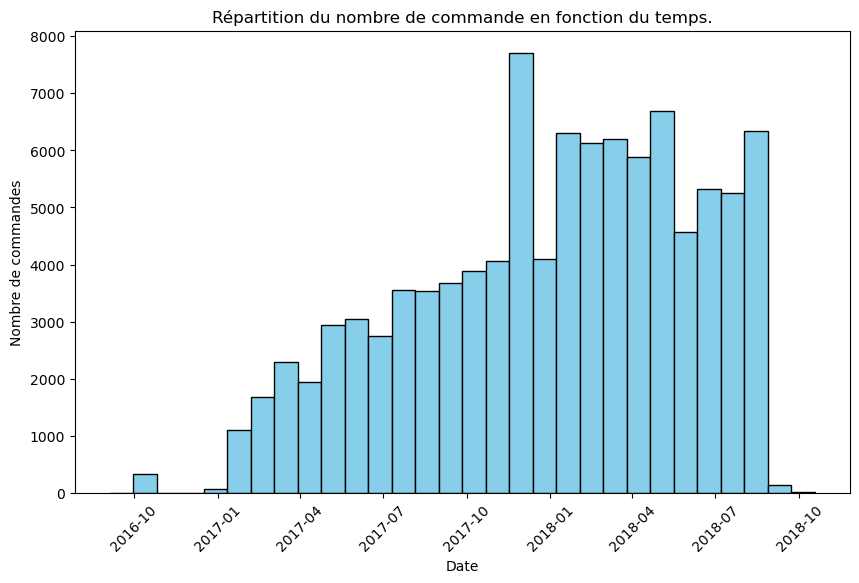

In [4]:
# Visualisation de la répartiion des commandes cliens : 

display(data['order_purchase_timestamp'].describe())
print('\n'+'--'*50+'\n')
print(f"date de début de collecte des données : {data['order_purchase_timestamp'].min()}\n")
print(f"date de fin de collecte des données : {data['order_purchase_timestamp'].max()}")
print('\n'+'--'*50+'\n')

serie = data['order_purchase_timestamp'].sort_values().copy()

# Création du graphe : 
plt.figure(figsize=(10, 6))
plt.hist(serie, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Date')
plt.ylabel("Nombre de commandes")
plt.title('Répartition du nombre de commande en fonction du temps.')
plt.xticks(rotation=45)  
plt.show()

del serie

### 3.2. <a id='toc3_2_'></a>[Création de data_init](#toc0_)
DataFrame des commandes sur la période initiale définie.

In [5]:
# Création de data_init : 

taille_init = 0.1

data_init = data.head(round(len(data)*taille_init))

# Affichage : 
nb_jours_data_init = (data_init['order_purchase_timestamp'].max() - data_init['order_purchase_timestamp'].min()).days
nb_jours_data = (data['order_purchase_timestamp'].max() - data['order_purchase_timestamp'].min()).days

print(f"La période initiale est éagle à {taille_init*100}% des premières commandes de data soit :\n"
      f"\t- {len(data_init)} commandes sur {len(data)}\n"
      f"\t- une période temporelle de {nb_jours_data_init} jours pour un total de {nb_jours_data} jours dans data")

del taille_init, nb_jours_data, nb_jours_data_init

La période initiale est éagle à 10.0% des premières commandes de data soit :
	- 9944 commandes sur 99437
	- une période temporelle de 254 jours pour un total de 772 jours dans data


## 4. <a id='toc4_'></a>[Feature engineering 1](#toc0_)

In [14]:
# Importation du classeur de modèles : 

name = 'models_RFMS'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'rb') as fichier:
    models_RFMS = pickle.load(fichier)
    
del name, chemin_fichier

### 4.1. <a id='toc4_1_'></a>[Evolution des ARI](#toc0_)

In [15]:
# Calcul des ARI sur différentes périodes temporelles : 

# Création de la liste de périodes : 
ls_periods = ['D', 'W', 'M']

# Création d'un dictionnaire pour stocker les données : 
resultats_evo = {}

# Calcul des ari : 
for periode in ls_periods: 
    result_df  = fct_projet_5.evo_ari(
        df=data,
        df_init=data_init,
        model=models_RFMS['KMeans']['model'],
        period=periode,
        transformation_func=fct_projet_5.transformation_df_RFMS,
    )
    
    print(result_df.shape)
    # Stockage des résultats : 
    resultats_evo[periode] = {
        'result_df': result_df,
    }

del periode, ls_periods, result_df

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

(488, 2)


/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

(75, 2)


/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

(19, 2)


Résultat pour une période D :



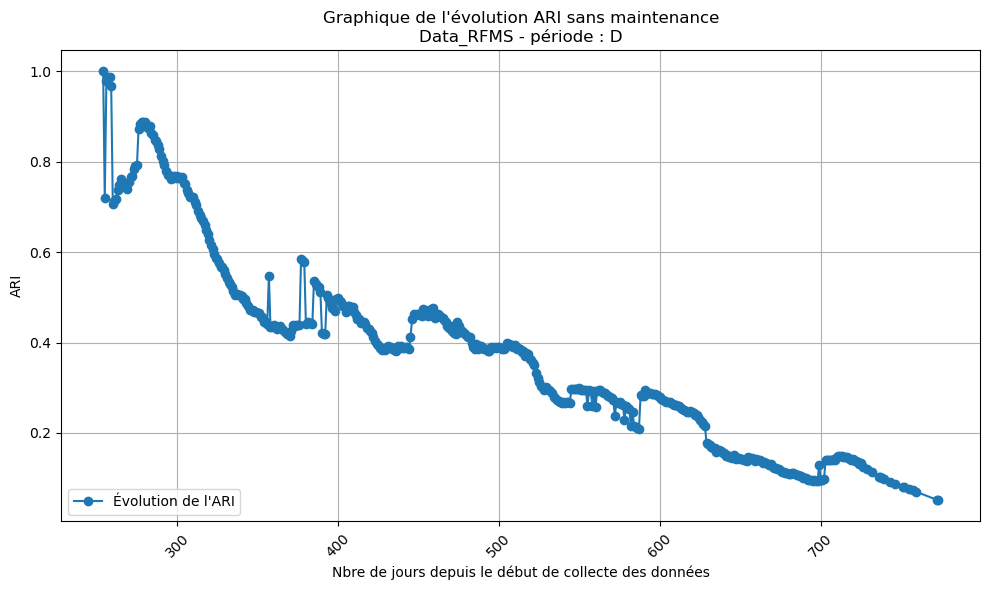


----------------------------------------------------------------------------------------------------

Résultat pour une période W :



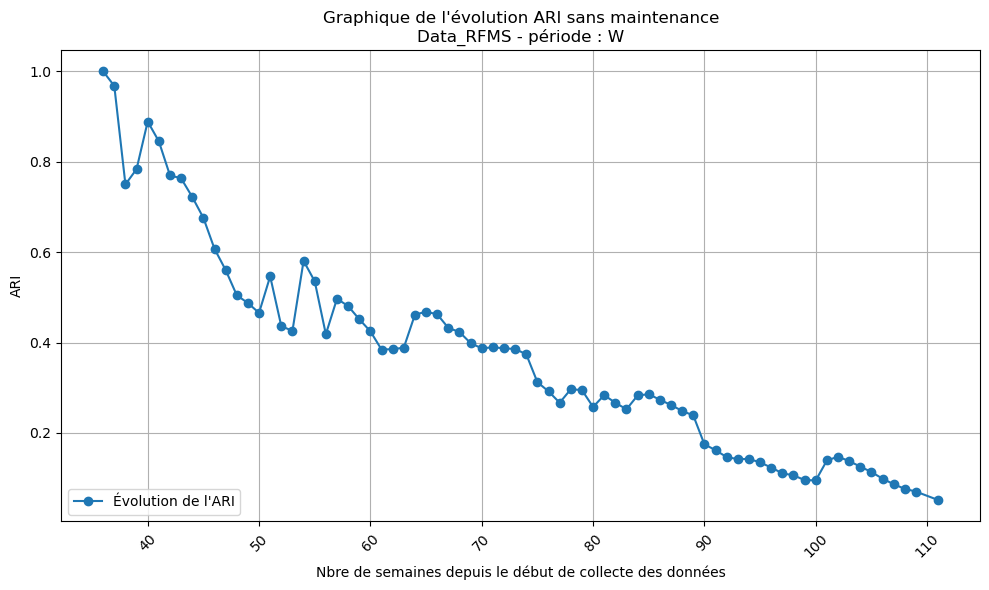


----------------------------------------------------------------------------------------------------

Résultat pour une période M :



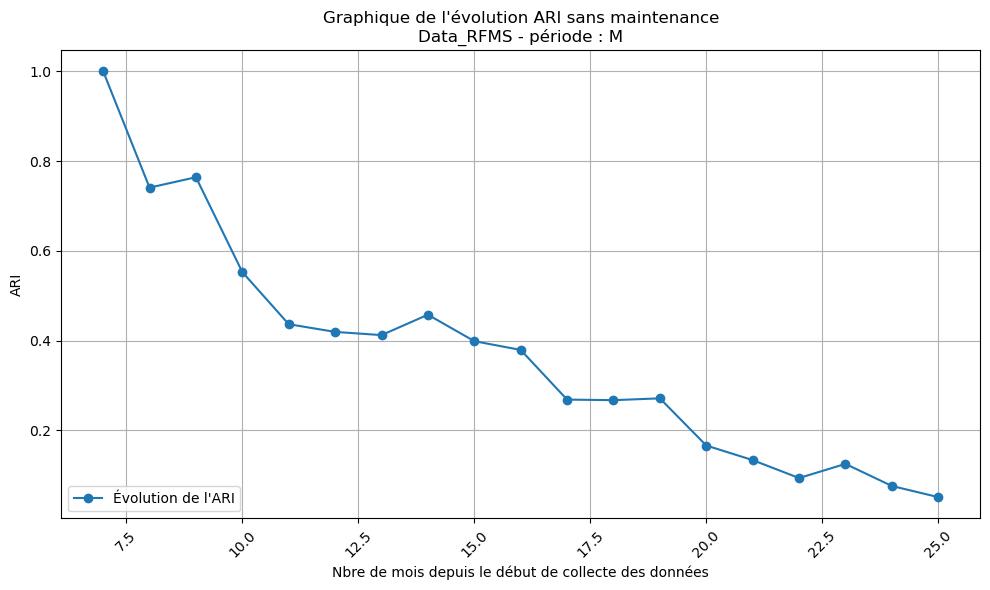


----------------------------------------------------------------------------------------------------



In [22]:
# Visualisation : 

for key in resultats_evo.keys():
    print(f"Résultat pour une période {key} :\n")

    fct_projet_5.visualisation_resultats_evo(
        df=resultats_evo[key]['result_df'],
        date_ref=data['order_purchase_timestamp'].min(),
        periode=key,
        title=f"Graphique de l'évolution ARI sans maintenance\nData_RFMS - période : {key}",
    )
    
    print('\n'+'--'*50+'\n')
    
del key

En visualisant l'évolution des ARI au cours du temps en fonction de plusieurs périodicités temporelles (quotidienne, hebdomadaire et mensuelle). 

On observe ici : 
- un lissage de l'évolution pour une périodicité mensuelle. 
- les mêmes fluctuation pour une périodicité hebdomadaire ou quotidienne. 

--> Choix d'une périodicité hebdomadaire (plus légère en calcul et pas de pertes d'information par rapport à la pétiodicité quotidienne).  

### 4.2. <a id='toc4_2_'></a>[Calcul de la fréquence de maintenance](#toc0_)
Utilisation d'un première méthose en utilisant un seuil limite d'ARI pour ré-entrainer le modèle. 

Utilisation d'une seconde méthode en utilisant un espace temporelle pour ré-entrainer le modèle.

In [23]:
# Calcul des fréquences de maintenance par rapport à un seuil ARI : 

# Création des résultats : 
    
result_df, maintenance_dates = fct_projet_5.maintenance_seuil(
    df=data,
    df_init=data_init,
    model=models_RFMS['KMeans']['model'],
    ari_seuil=0.8,
    period='W',
    transformation_func=fct_projet_5.transformation_df_RFMS,
)
    
# Stockage des résultats dans resultats_maintenance_seuil : 
    
resultats_maintenance_seuil = {
    'result_df': result_df,
    'maintenance_dates': maintenance_dates,
}

del result_df, maintenance_dates

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

In [26]:
# Calcul des fréquences de maintenance par rapport à une fréquence temporelle : 

# Création d'un dictionnaire pour récupérer les résulats : 
resultats_maintenance_tempo = {}

# Création des différentes période de maintenance : 
ls_week = [2, 4, 8, 10, 12, 14, 16]

# Création des résultats : 
for week in ls_week:
    
    result_df, maintenance_dates = fct_projet_5.maintenance_tempo(
        df=data, 
        df_init=data_init,
        model=models_RFMS['KMeans']['model'],
        transformation_func=fct_projet_5.transformation_df_RFMS,
        retrain_period=week,
        period='W',
    )
    
    # Stockage des résultats dans resultats_evo : 

    resultats_maintenance_tempo['retrain_period_'+str(week)+'_weeks'] ={
        'result_df': result_df,
        'maintenance_dates': maintenance_dates,
    } 

del result_df, maintenance_dates, ls_week, week

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_pa

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_pa

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_pa

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_pa

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_pa

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/27058465.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster

### 4.3. <a id='toc4_3_'></a>[Résultats](#toc0_)

----------------------------------------------------------------------------------------------------
Tracé des résultats - période d'échantillonnage quotidienne :
----------------------------------------------------------------------------------------------------



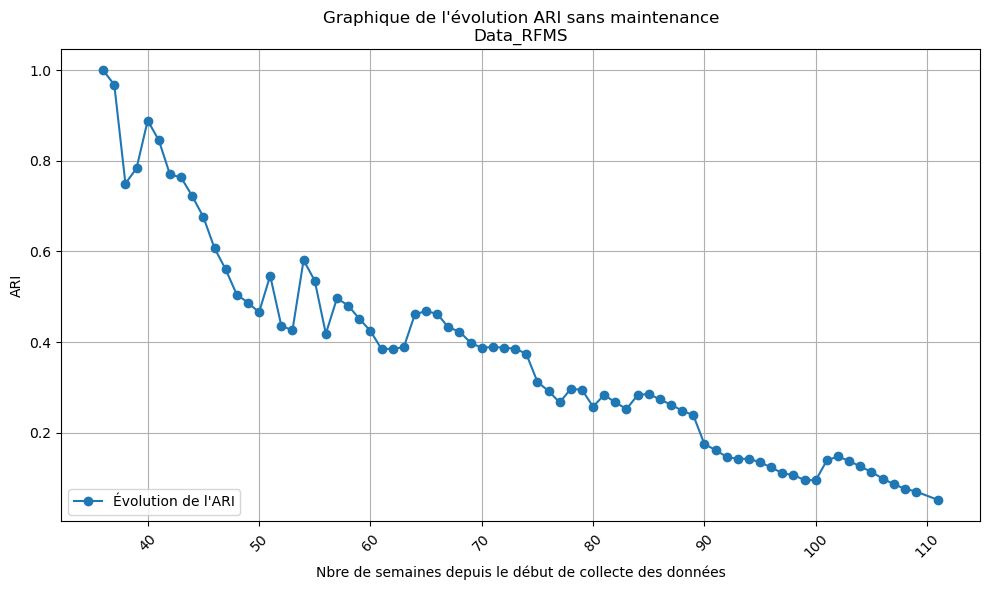


----------------------------------------------------------------------------------------------------



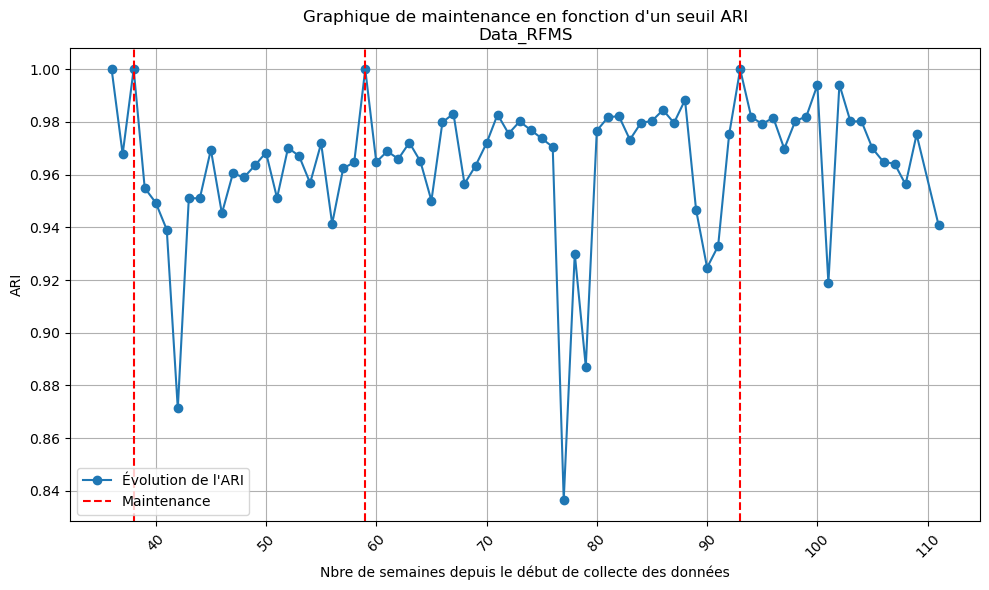


----------------------------------------------------------------------------------------------------



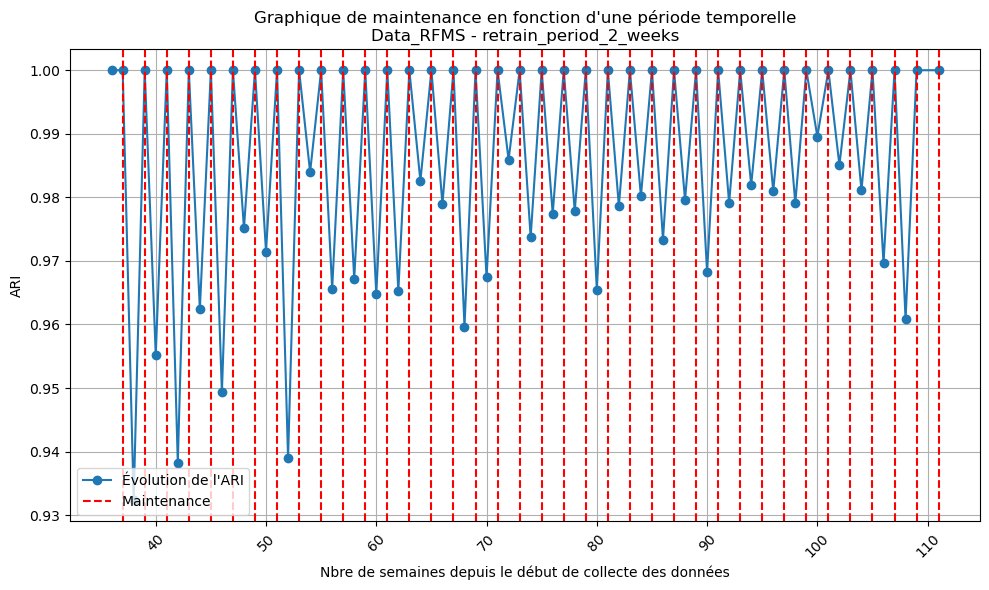

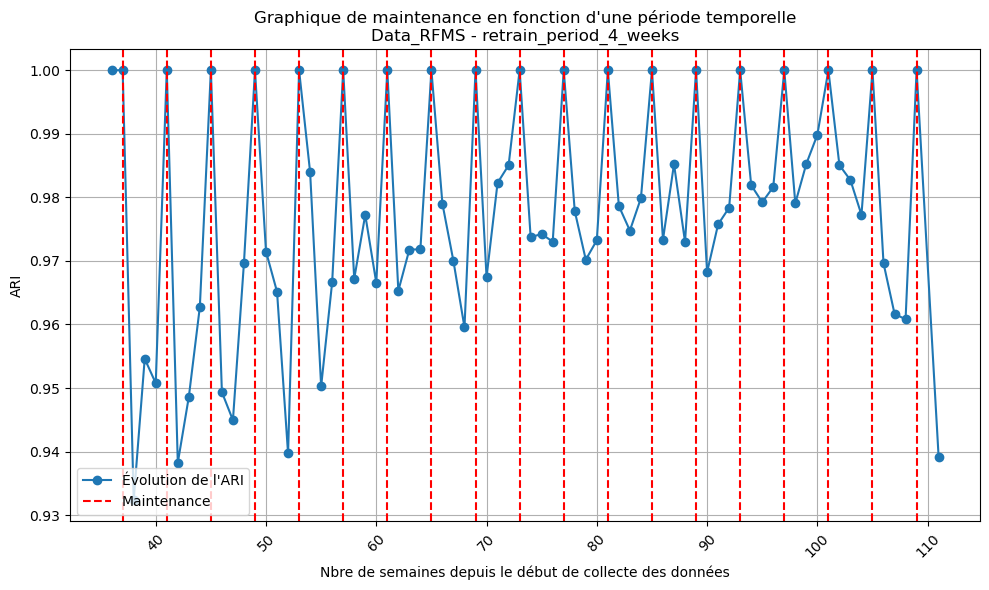

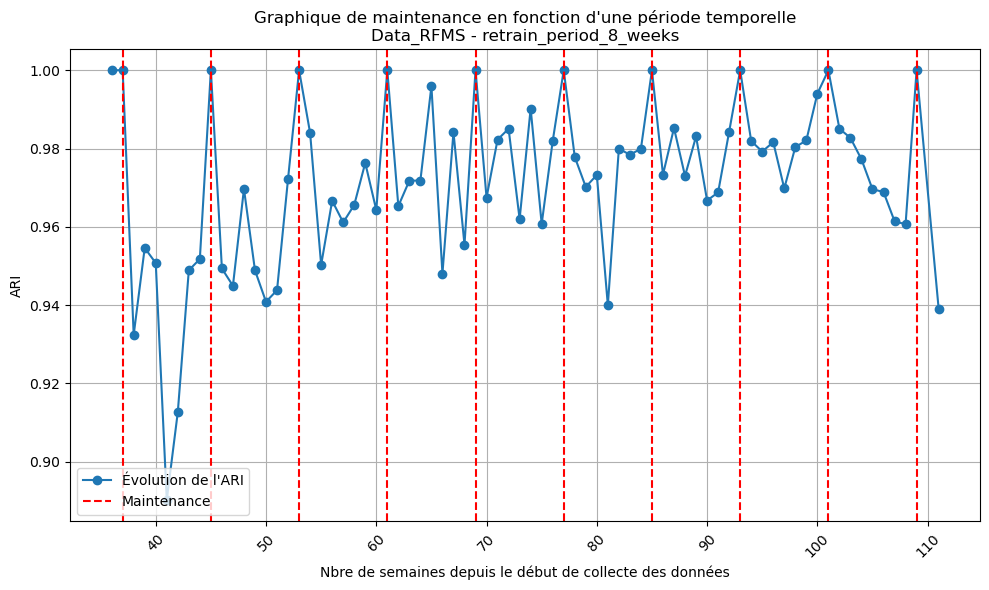

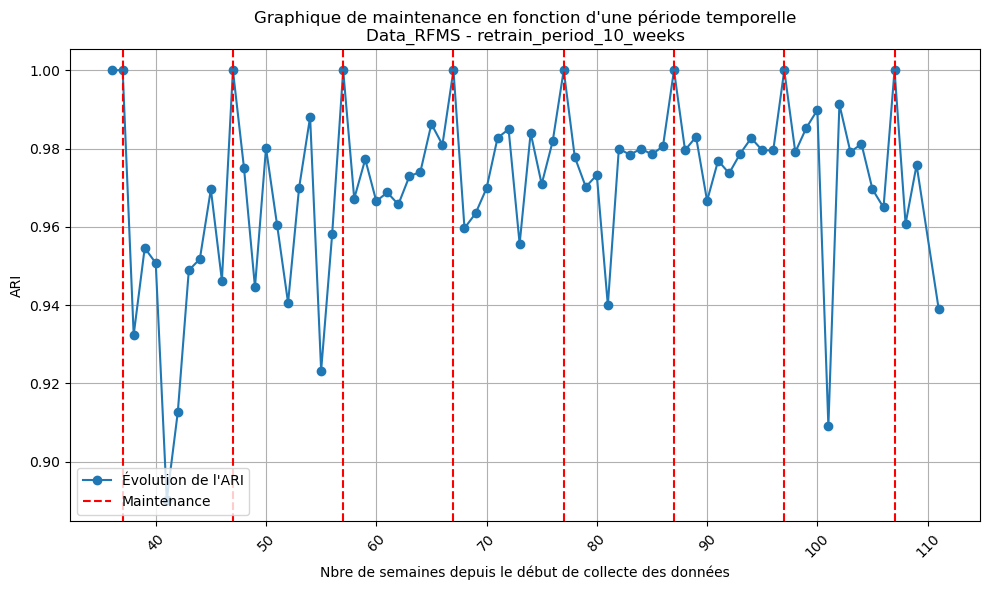

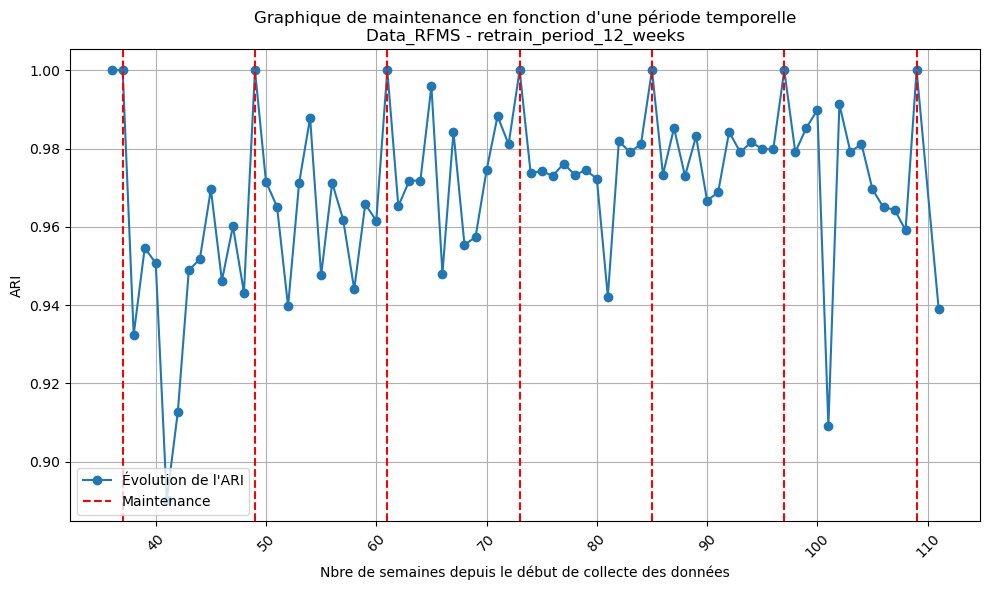

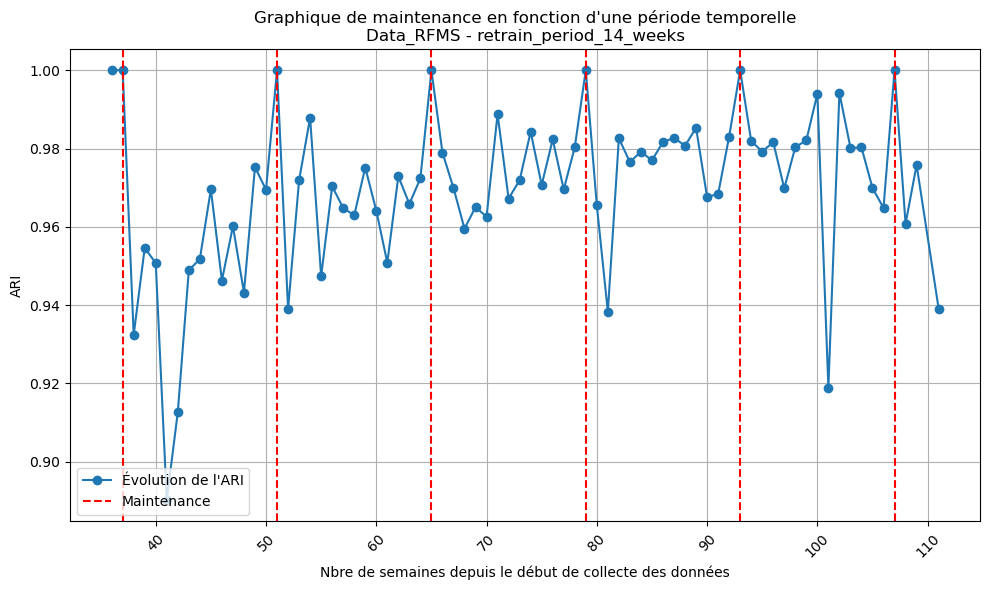

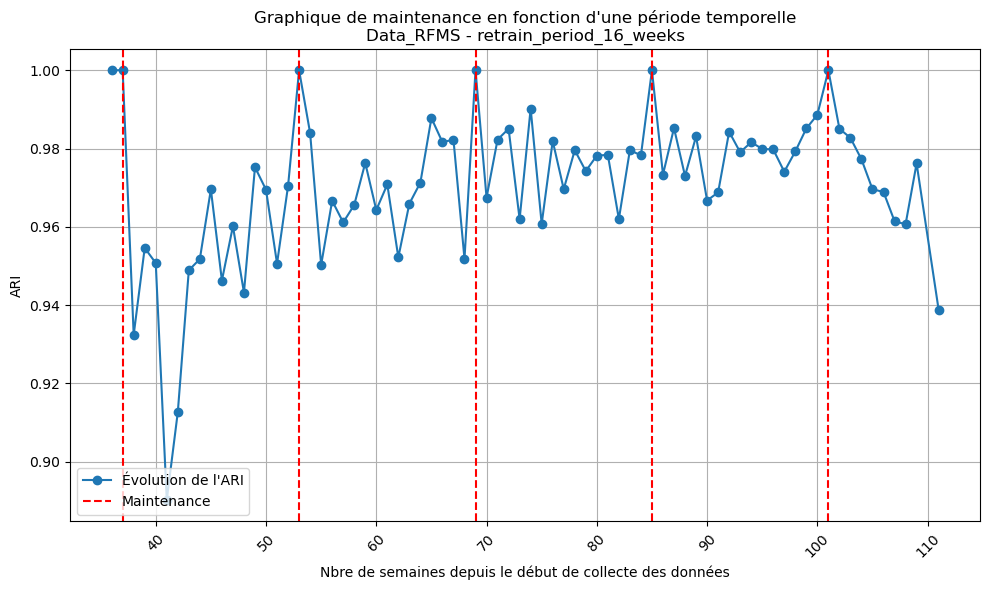


----------------------------------------------------------------------------------------------------



In [27]:
# Visualisation des résultats : 

print('--'*50)
print(f"Tracé des résultats - période d'échantillonnage quotidienne :")
print('--'*50+'\n')

# Graphique 1 - Evolution ARI période mensuel sans maintenance : 
fct_projet_5.visualisation_resultats_evo(
    df=resultats_evo['W']['result_df'],
    date_ref=data['order_purchase_timestamp'].min(),
    periode='W',
    title=f"Graphique de l'évolution ARI sans maintenance\nData_RFMS",
)
    
print('\n'+'--'*50+'\n')

# Graphique 2 - Evolution ARI période mensuel avec maintenance seuil : 
fct_projet_5.visualisation_resultats_maintenance(
    df=resultats_maintenance_seuil['result_df'],
    maintenance_dates=resultats_maintenance_seuil['maintenance_dates'],
    date_ref=data['order_purchase_timestamp'].min(),
    periode='W',
    title="Graphique de maintenance en fonction d'un seuil ARI\nData_RFMS",
)

print('\n'+'--'*50+'\n')

# Graphique 3 - Evolution ARI période mensuel avec maintenance temporelle : 
for key in resultats_maintenance_tempo.keys():
    
    fct_projet_5.visualisation_resultats_maintenance(
        df=resultats_maintenance_tempo[key]['result_df'],
        maintenance_dates=resultats_maintenance_tempo[key]['maintenance_dates'],
        date_ref=data['order_purchase_timestamp'].min(),
        periode='W',
        title=f"Graphique de maintenance en fonction d'une période temporelle\nData_RFMS - {key}",
    )
    
print('\n'+'--'*50+'\n')

del key

En prenant une périodicité hebdomadaire, comme définit précédemment : 

- Méthode 1 : maintenance basée sur un seuil ARI : 
    - avantage : permet de limiter le nombre de maintenance a effectuer et évite une dégradation trop importante du clustering (seuil ARI à définir en fonction des besoins et attente de l'entreprise, ici seuil fixé à 0.8)
    - inconvénient : ne permet pas d'établir un contrat de maintenance à l'avance définit temporellement (cela va dépendre de la dérive des clusters en fonction des nouvelles commandes/clients de la société). 
    
- Méthode 2 : maintenance basée sur une périodicité temporelle : 
    - avantage : permet d'établir facilement une contrat de maintenance en fonction d'une périodicité. 
    - inconvénient : ne permet pas de palier à une forte dérive des clusters entre deux dates de maintenance (peut être problèmatique en fonction de l'évolution des commandes/clients de la société). 
    
    
Au vu des différentes tests de maintenance réalisé ici pour le feature engineering 1 : 
- Proposition d'un contrat de maintenance temporelle : maintenance toutes les 16 semaines (permets un maintient raisonnable de la dérive des clusters). 
- Préconisafion de la mise en place d'une maintenance par seuil ari en parallèle : prévention de toutes dérive du clustering en cas de fortes périodes de commandes ou de commandes extrêmement atypiques. 

In [28]:
# Enregistrement des dictionnaires de résultats : 

name = 'resultats_evo_RFMS'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_evo, f)

name = 'resultats_maintenance_seuil_RFMS'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_maintenance_seuil, f)

name = 'resultats_maintenance_tempo_RFMS'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_maintenance_tempo, f)

del name, chemin_fichier

In [29]:
# Suppression des données : 
del models_RFMS, resultats_evo, resultats_maintenance_seuil, resultats_maintenance_tempo

## 5. <a id='toc5_'></a>[Feature enginering 2](#toc0_)

In [30]:
# Importation du classeur de modèles : 

name = 'models_FE2'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'rb') as fichier:
    models_FE2 = pickle.load(fichier)
    
del name, chemin_fichier

### 5.1. <a id='toc5_1_'></a>[Evolution des ARI](#toc0_)

In [31]:
# Calcul des ARI sur différentes périodes temporelles : 

# Création de la liste de périodes : 
ls_periods = ['D', 'W', 'M']

# Création d'un dictionnaire pour stocker les données : 
resultats_evo = {}

# Calcul des ari : 
for periode in ls_periods: 
    result_df = fct_projet_5.evo_ari(
        df=data,
        df_init=data_init,
        model=models_FE2['KMeans']['model'],
        period=periode,
        transformation_func=fct_projet_5.transformation_df,
    )
    
    # Stockage des résultats : 
    resultats_evo[periode] = {
        'result_df': result_df,
    }

del periode, ls_periods, result_df

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Résultat pour une période D :



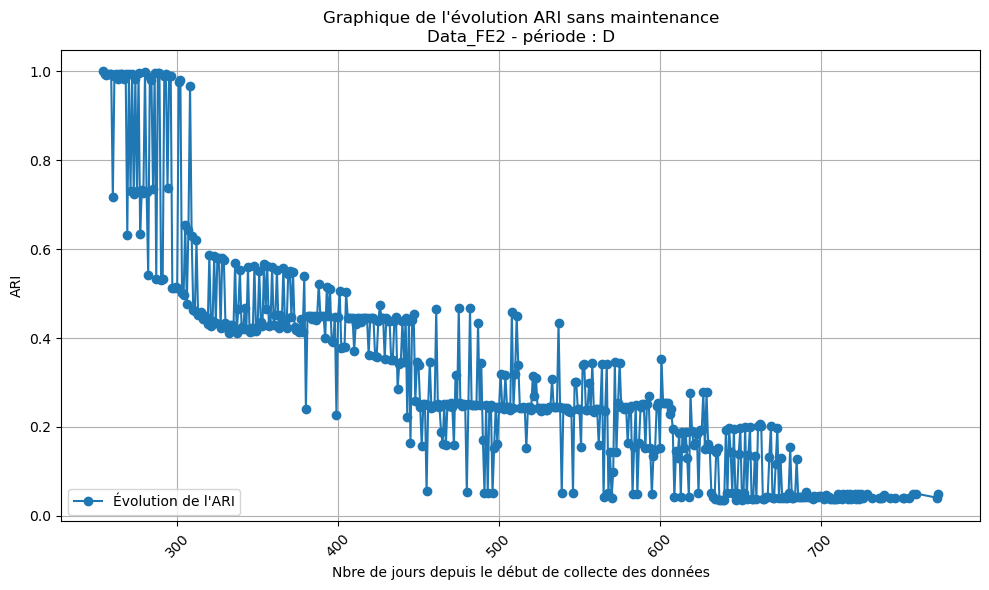


----------------------------------------------------------------------------------------------------

Résultat pour une période W :



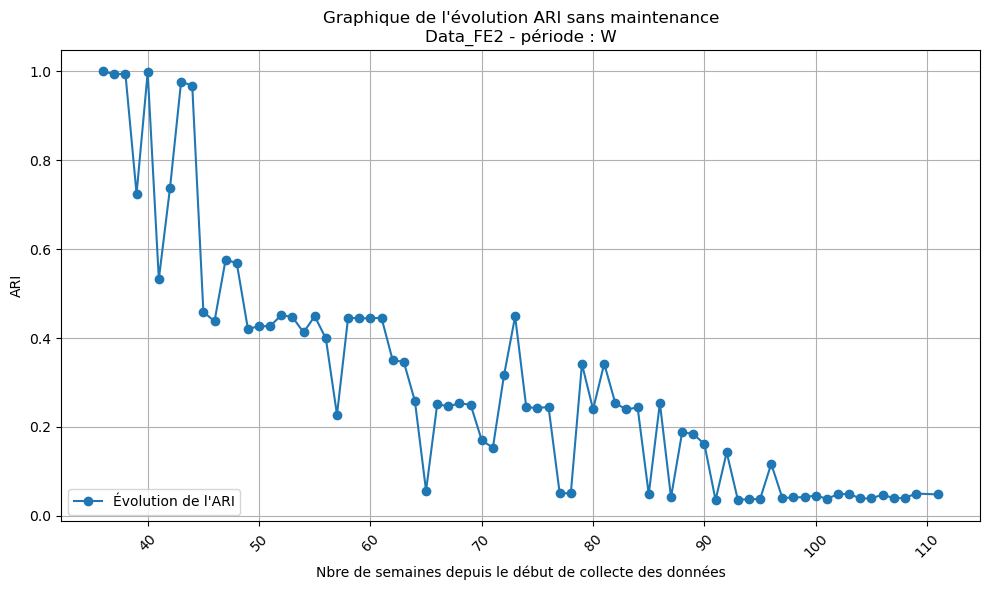


----------------------------------------------------------------------------------------------------

Résultat pour une période M :



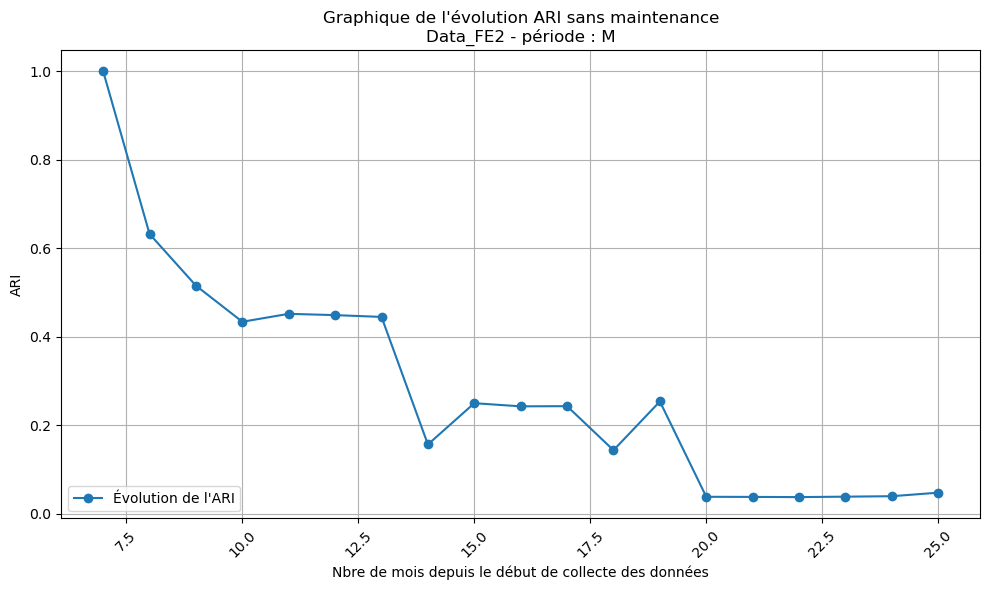


----------------------------------------------------------------------------------------------------



In [32]:
# Visualisation : 

for key in resultats_evo.keys():
    print(f"Résultat pour une période {key} :\n")

    fct_projet_5.visualisation_resultats_evo(
        df=resultats_evo[key]['result_df'],
        date_ref=data['order_purchase_timestamp'].min(),
        periode=key,
        title=f"Graphique de l'évolution ARI sans maintenance\nData_FE2 - période : {key}",
    )
    
    print('\n'+'--'*50+'\n')
    
del key

En visualisant l'évolution des ARI au cours du temps en fonction de plusieurs périodicités temporelles (quotidienne, hebdomadaire et mensuelle). 

On observe ici : 
- une stabilité moindre des clusters par rapport au FE_1 (fluctuations plus importantes liées à la segmentation plus détaillées et donc plus sensible à l'introduction de nouvelles commandes/clients).
- un lissage de l'évolution pour une périodicité mensuelle. 
- les mêmes fluctuations globlaes pour une périodicité hebdomadaire ou quotidienne. 

--> Choix d'une périodicité hebdomadaire (plus légère en calcul et pas de pertes d'information par rapport à la pétiodicité quotidienne).  

### 5.2. <a id='toc5_2_'></a>[Calcul de la fréquence de maintenance](#toc0_)
Utilisation d'un première méthose en utilisant un seuil limite d'ARI pour ré-entrainer le modèle. 

Utilisation d'une seconde méthode en utilisant un espace temporelle pour ré-entrainer le modèle.

In [33]:
# Calcul des fréquences de maintenance par rapport à un seuil ARI : 

# Création des résultats : 
    
result_df, maintenance_dates = fct_projet_5.maintenance_seuil(
    df=data,
    df_init=data_init,
    model=models_FE2['KMeans']['model'],
    ari_seuil=0.8,
    period='W',
    transformation_func=fct_projet_5.transformation_df,
)
    
# Stockage des résultats dans resultats_maintenance_seuil : 
    
resultats_maintenance_seuil = {
    'result_df': result_df,
    'maintenance_dates': maintenance_dates,
}

del result_df, maintenance_dates

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [34]:
# Calcul des fréquence de maintenance par rapport à une fréquence temporelle : 

# Création d'un dictionnaire pour récupérer les résulats : 
resultats_maintenance_tempo = {}

# Création des différentes période de maintenance : 
ls_week = [2, 4, 8, 10, 12, 14, 16]

# Création des résultats : 
for week in ls_week:
    
    result_df, maintenance_dates = fct_projet_5.maintenance_tempo(
        df=data, 
        df_init=data_init,
        model=models_FE2['KMeans']['model'],
        transformation_func=fct_projet_5.transformation_df,
        retrain_period=week,
        period='W',
    )
    
    # Stockage des résultats dans resultats_evo : 

    resultats_maintenance_tempo['retrain_period_'+str(week)+'_weeks'] ={
        'result_df': result_df,
        'maintenance_dates': maintenance_dates,
    } 

del result_df, maintenance_dates, ls_week, week

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

### 5.3. <a id='toc5_3_'></a>[Résultats](#toc0_)

----------------------------------------------------------------------------------------------------
Tracé des résultats - période d'échantillonnage hebdomadaire :
----------------------------------------------------------------------------------------------------



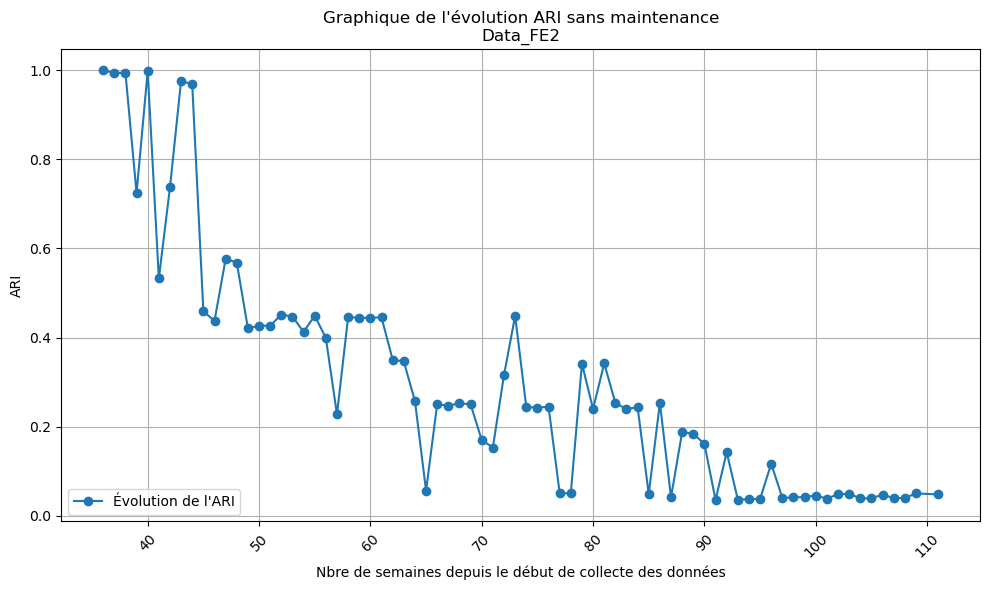


----------------------------------------------------------------------------------------------------



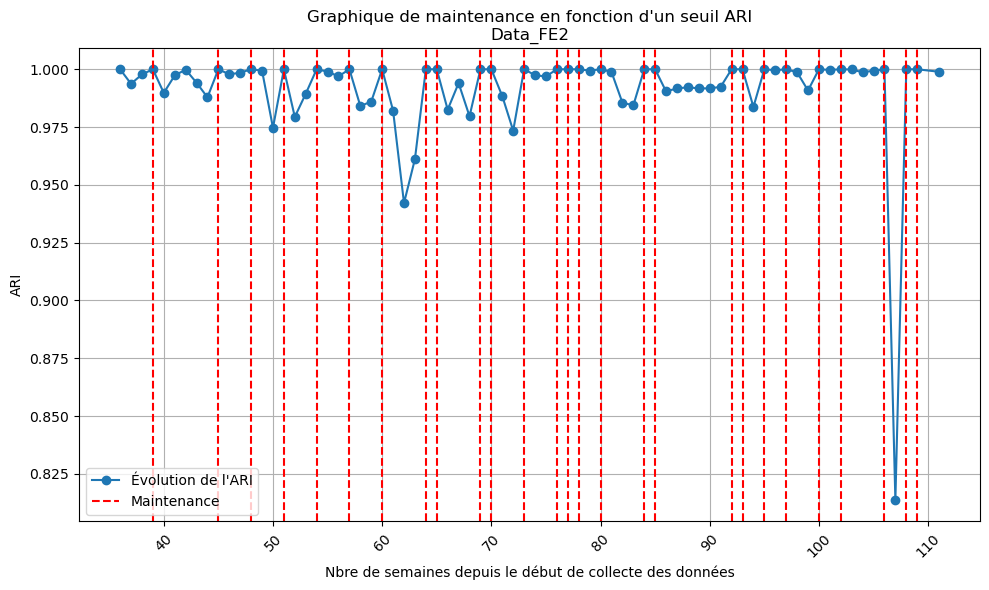


----------------------------------------------------------------------------------------------------



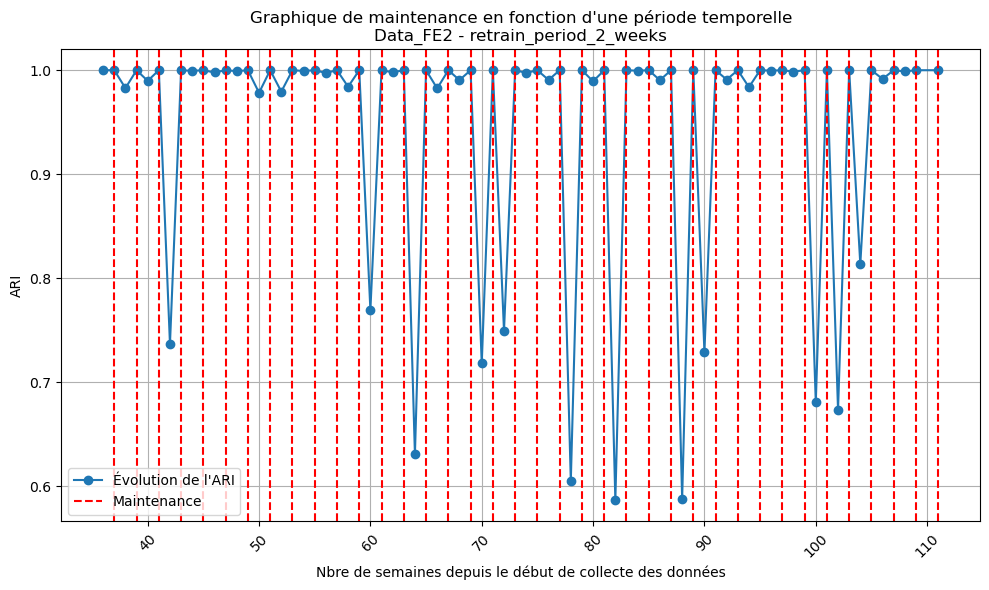

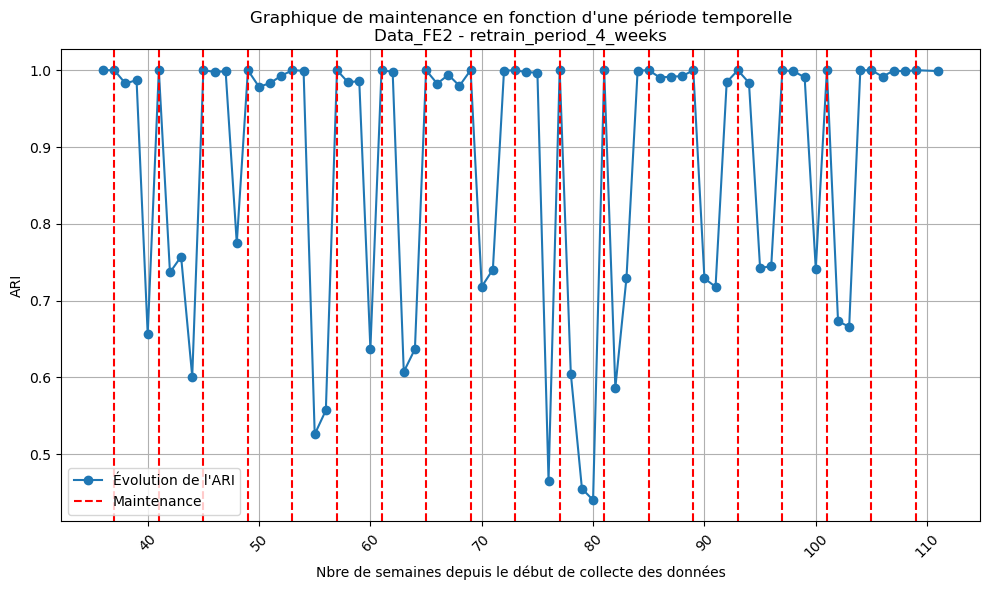

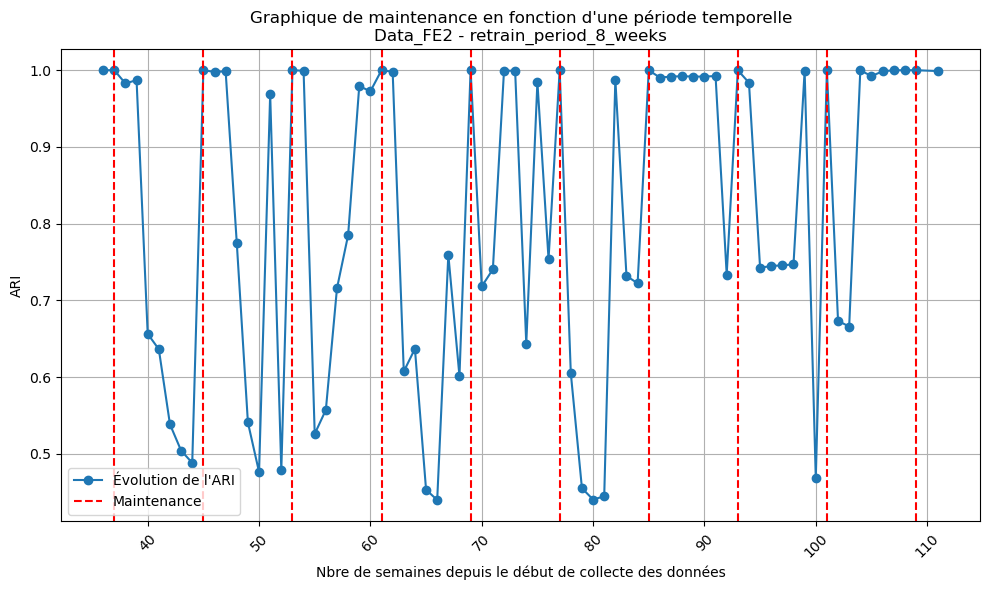

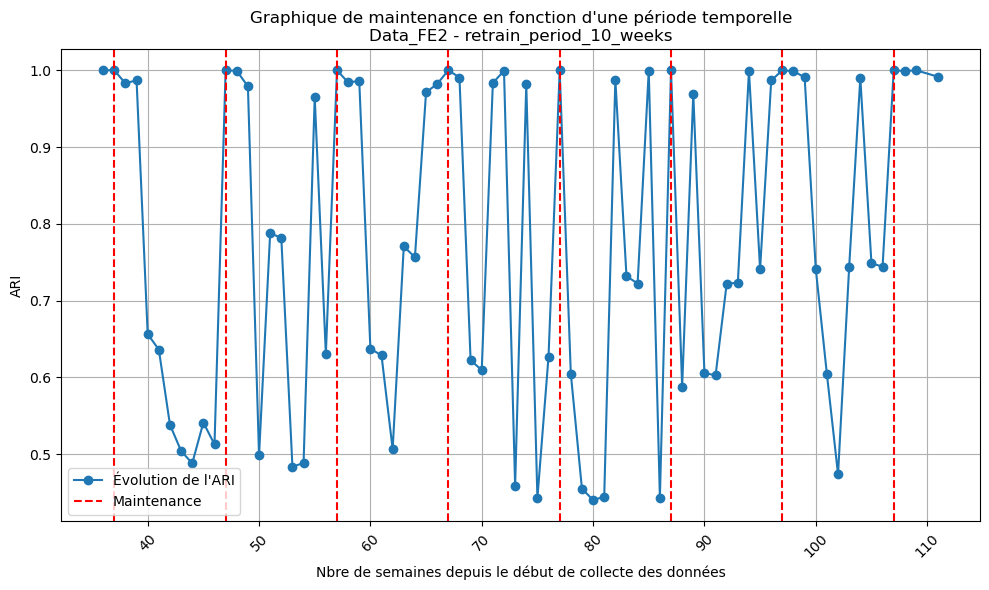

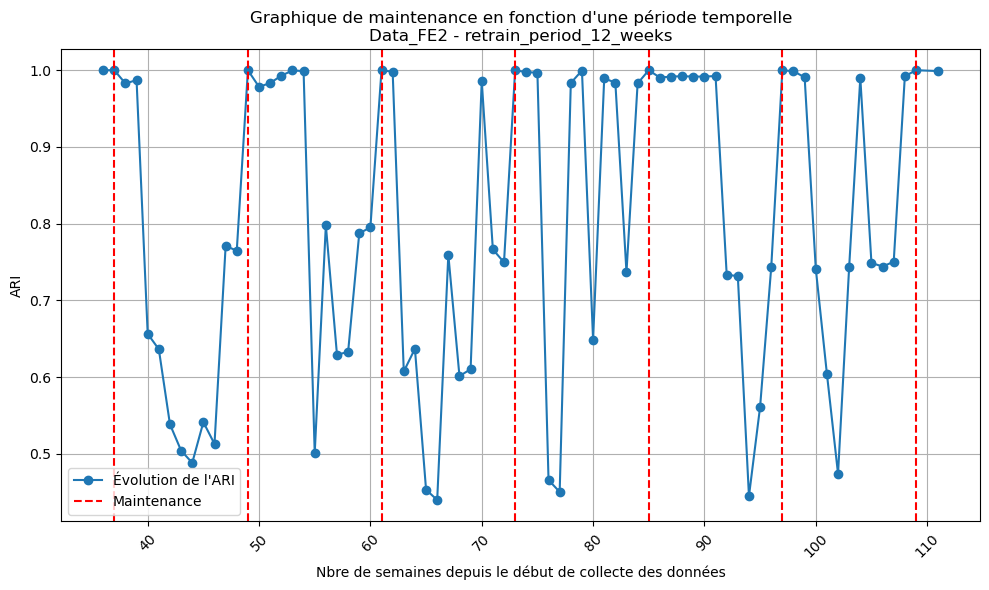

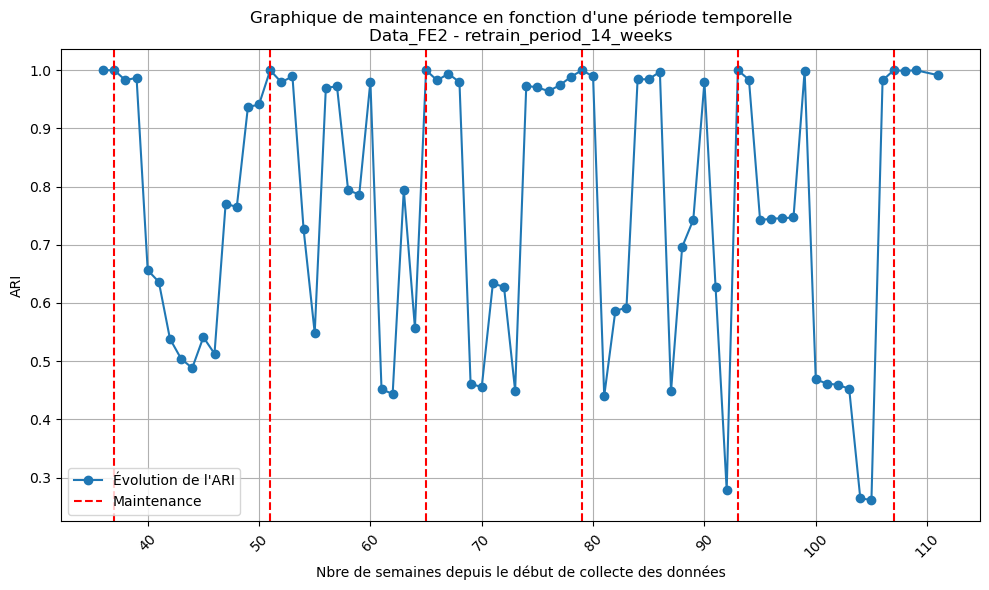

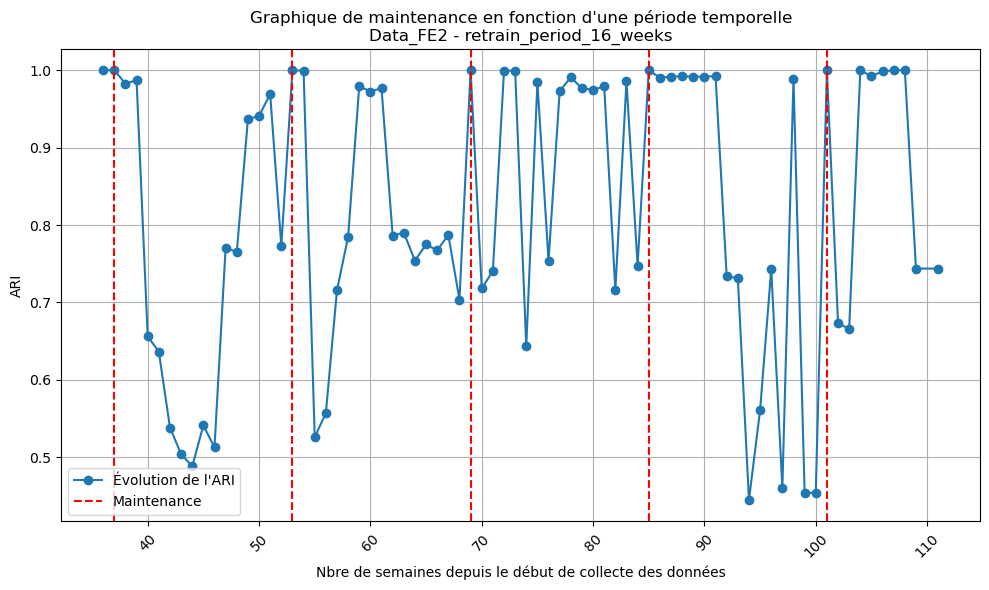


----------------------------------------------------------------------------------------------------



In [35]:
# Visualisation des résultats : 

print('--'*50)
print(f"Tracé des résultats - période d'échantillonnage hebdomadaire :")
print('--'*50+'\n')

# Graphique 1 - Evolution ARI période mensuel sans maintenance : 
fct_projet_5.visualisation_resultats_evo(
    df=resultats_evo['W']['result_df'],
    date_ref=data['order_purchase_timestamp'].min(),
    periode='W',
    title=f"Graphique de l'évolution ARI sans maintenance\nData_FE2",
)
    
print('\n'+'--'*50+'\n')

# Graphique 2 - Evolution ARI période mensuel avec maintenance seuil : 
fct_projet_5.visualisation_resultats_maintenance(
    df=resultats_maintenance_seuil['result_df'],
    maintenance_dates=resultats_maintenance_seuil['maintenance_dates'],
    date_ref=data['order_purchase_timestamp'].min(),
    periode='W',
    title="Graphique de maintenance en fonction d'un seuil ARI\nData_FE2",
)

print('\n'+'--'*50+'\n')

# Graphique 3 - Evolution ARI période mensuel avec maintenance temporelle : 
for key in resultats_maintenance_tempo.keys():
    
    fct_projet_5.visualisation_resultats_maintenance(
        df=resultats_maintenance_tempo[key]['result_df'],
        maintenance_dates=resultats_maintenance_tempo[key]['maintenance_dates'],
        date_ref=data['order_purchase_timestamp'].min(),
        periode='W',
        title=f"Graphique de maintenance en fonction d'une période temporelle\nData_FE2 - {key}",
    )
    
print('\n'+'--'*50+'\n')

del key

En prenant une périodicité hebdomadaire, comme définit précédemment : 

- Méthode 1 : maintenance basée sur un seuil ARI : 
    - avantage : permet de limiter le nombre de maintenance a effectuer et évite une dégradation trop importante du clustering (seuil ARI à définir en fonction des besoins et attente de l'entreprise, ici seuil fixé à 0.8)
    - inconvénient : ne permet pas d'établir un contrat de maintenance à l'avance définit temporellement (cela va dépendre de la dérive des clusters en fonction des nouvelles commandes/clients de la société). 
    
- Méthode 2 : maintenance basée sur une périodicité temporelle : 
    - avantage : permet d'établir facilement une contrat de maintenance en fonction d'une périodicité. 
    - inconvénient : ne permet pas de palier à une forte dérive des clusters entre deux dates de maintenance (peut être problèmatique en fonction de l'évolution des commandes/clients de la société). 
    
    
Au vu des différentes tests de maintenance réalisé ici pour le feature engineering 2 : 
- Proposition d'un contrat de maintenance temporelle : maintenance toutes les 2 semaines (permets un meilleur maintient de la dérive des clusters, même si des dérives importantes sont constatées due à la segmentation plus détaillée). 
- Préconisafion de la mise en place d'une maintenance par seuil ari en parallèle : prévention de toutes dérive du clustering en cas de fortes périodes de commandes ou de commandes extrêmement atypiques. 

In [37]:
# Enregistrement des dictionnaires de résultats : 

name = 'resultats_evo_FE2'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_evo, f)

name = 'resultats_maintenance_seuil_FE2'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_maintenance_seuil, f)

name = 'resultats_maintenance_tempo_FE2'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_maintenance_tempo, f)

del name, chemin_fichier

In [38]:
# Suppression des données : 
del models_FE2, resultats_evo, resultats_maintenance_seuil, resultats_maintenance_tempo

## 6. <a id='toc6_'></a>[Feature enginering 3](#toc0_)

In [39]:
# Importation du classeur de modèles : 

name = 'models_FE3'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'rb') as fichier:
    models_FE3 = pickle.load(fichier)
    
del name, chemin_fichier

### 6.1. <a id='toc6_1_'></a>[Evolution des ARI](#toc0_)

In [40]:
# Calcul des ARI sur différentes périodes temporelles : 

# Création de la liste de périodes : 
ls_periods = ['D', 'W', 'M']

# Création d'un dictionnaire pour stocker les données : 
resultats_evo = {}

# Calcul des ari : 
for periode in ls_periods: 
    result_df = fct_projet_5.evo_ari(
        df=data,
        df_init=data_init,
        model=models_FE3['KMeans']['model'],
        period=periode,
        transformation_func=fct_projet_5.transformation_df,
    )
    
    # Stockage des résultats : 
    resultats_evo[periode] = {
        'result_df': result_df,
    }

del periode, ls_periods, result_df

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Résultat pour une période D :



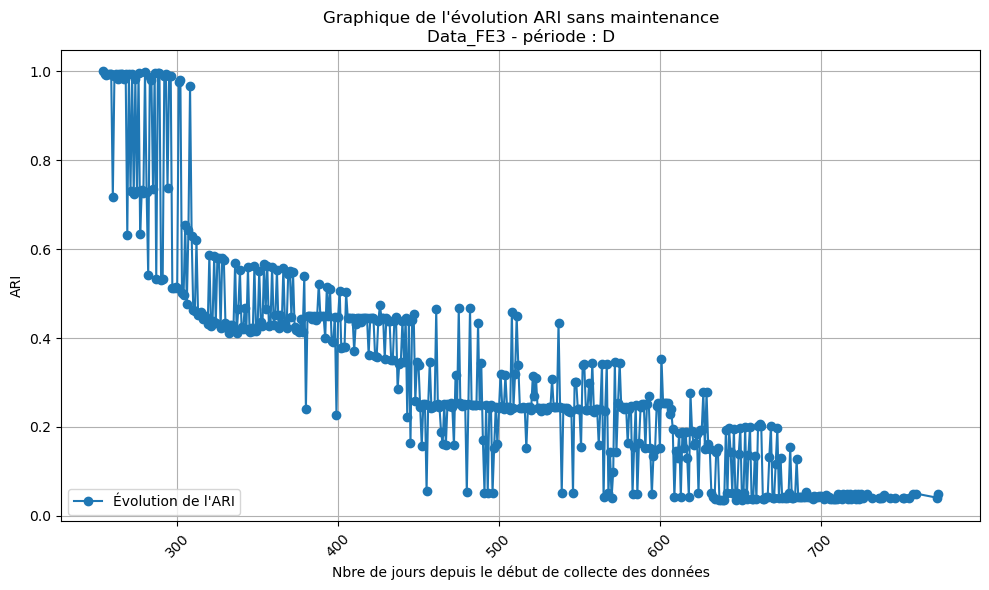


----------------------------------------------------------------------------------------------------

Résultat pour une période W :



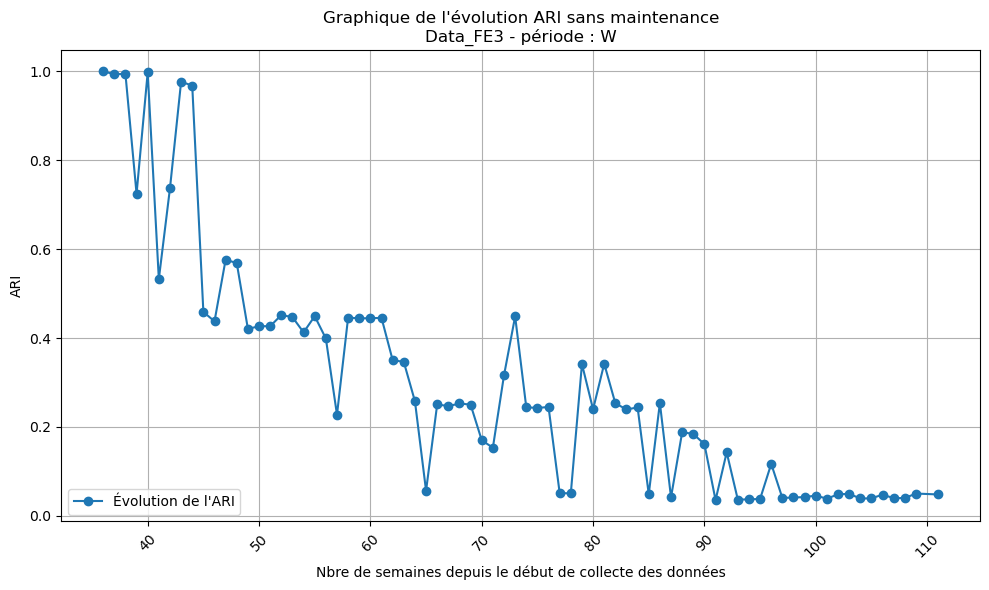


----------------------------------------------------------------------------------------------------

Résultat pour une période M :



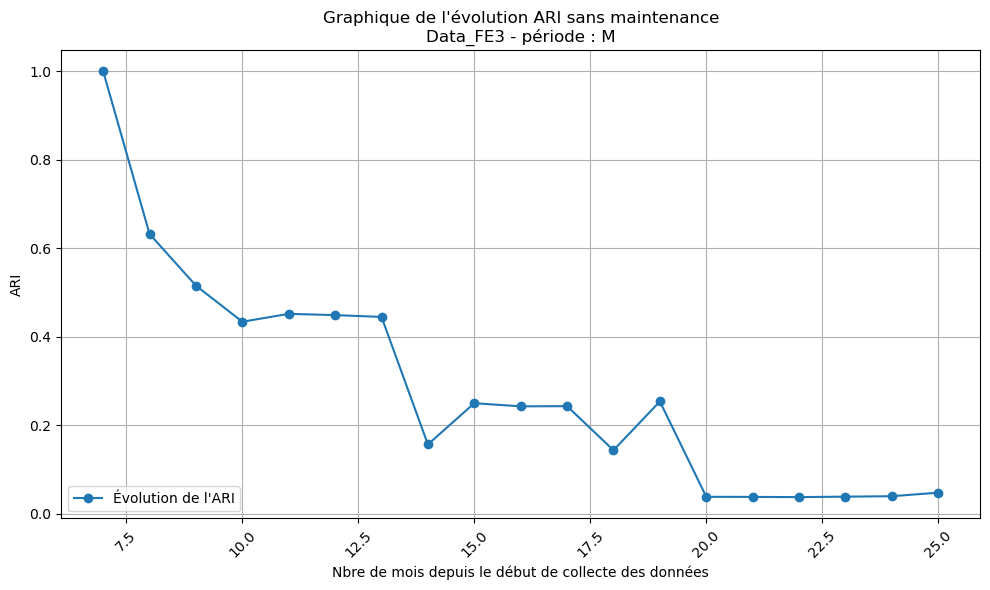


----------------------------------------------------------------------------------------------------



In [41]:
# Visualisation : 

for key in resultats_evo.keys():
    print(f"Résultat pour une période {key} :\n")

    fct_projet_5.visualisation_resultats_evo(
        df=resultats_evo[key]['result_df'],
        date_ref=data['order_purchase_timestamp'].min(),
        periode=key,
        title=f"Graphique de l'évolution ARI sans maintenance\nData_FE3 - période : {key}",
    )
    
    print('\n'+'--'*50+'\n')
    
del key

En visualisant l'évolution des ARI au cours du temps en fonction de plusieurs périodicités temporelles (quotidienne, hebdomadaire et mensuelle). 

On observe ici : 
- Les mêmes fluctuations que pour le FE_2 (en toute logique puisque la différence entre le FE_2 et le FE_3 est dûe à. la suppression des variables jour_de_commande et moment_de_commande). 
- un lissage de l'évolution pour une périodicité mensuelle. 
- les mêmes fluctuations globlaes pour une périodicité hebdomadaire ou quotidienne. 

--> Choix d'une périodicité hebdomadaire (plus légère en calcul et pas de pertes d'information par rapport à la pétiodicité quotidienne).  

### 6.2. <a id='toc6_2_'></a>[Calcul de la fréquence de maintenance](#toc0_)
Utilisation d'un première méthose en utilisant un seuil limite d'ARI pour ré-entrainer le modèle. 

Utilisation d'une seconde méthode en utilisant un espace temporelle pour ré-entrainer le modèle.

In [42]:
# Calcul des fréquences de maintenance par rapport à un seuil ARI : 

# Création des résultats : 
    
result_df, maintenance_dates = fct_projet_5.maintenance_seuil(
    df=data,
    df_init=data_init,
    model=models_FE3['KMeans']['model'],
    ari_seuil=0.8,
    period='W',
    transformation_func=fct_projet_5.transformation_df,
)
    
# Stockage des résultats dans resultats_maintenance_seuil : 
    
resultats_maintenance_seuil = {
    'result_df': result_df,
    'maintenance_dates': maintenance_dates,
}

del result_df, maintenance_dates 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [43]:
# Calcul des fréquence de maintenance par rapport à une fréquence temporelle : 

# Création d'un dictionnaire pour récupérer les résulats : 
resultats_maintenance_tempo = {}

# Création des différentes période de maintenance : 
ls_week = [2, 4, 8, 10, 12, 14, 16]

# Création des résultats : 
for week in ls_week:
    
    result_df, maintenance_dates = fct_projet_5.maintenance_tempo(
        df=data, 
        df_init=data_init,
        model=models_FE3['KMeans']['model'],
        transformation_func=fct_projet_5.transformation_df,
        retrain_period=week,
        period='W',
    )
    
    # Stockage des résultats dans resultats_evo : 

    resultats_maintenance_tempo['retrain_period_'+str(week)+'_weeks'] ={
        'result_df': result_df,
        'maintenance_dates': maintenance_dates,
    } 

del result_df, maintenance_dates, ls_week, week

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/var/folders/9p/2j_ns6jx4vl2xhdr3wz4n85m0000gn/T/ipykernel_1622/3360664328.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recence'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days
/Users/maxime/anaconda3/lib/python3.10/site-packages/sklearn/clu

### 6.3. <a id='toc6_3_'></a>[Résultats](#toc0_)

----------------------------------------------------------------------------------------------------
Tracé des résultats - période d'échantillonnage hebdomadaire :
----------------------------------------------------------------------------------------------------



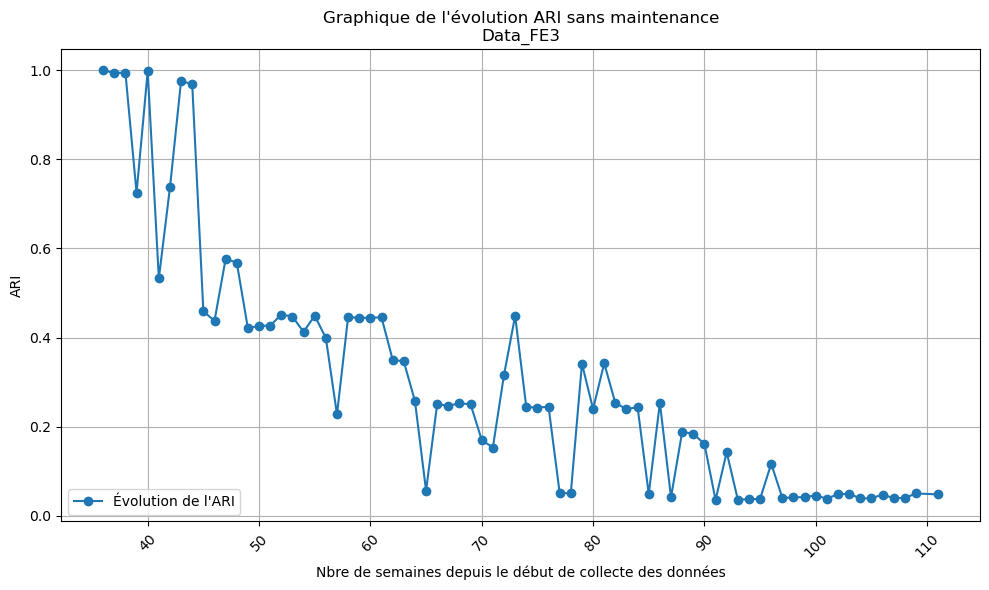


----------------------------------------------------------------------------------------------------



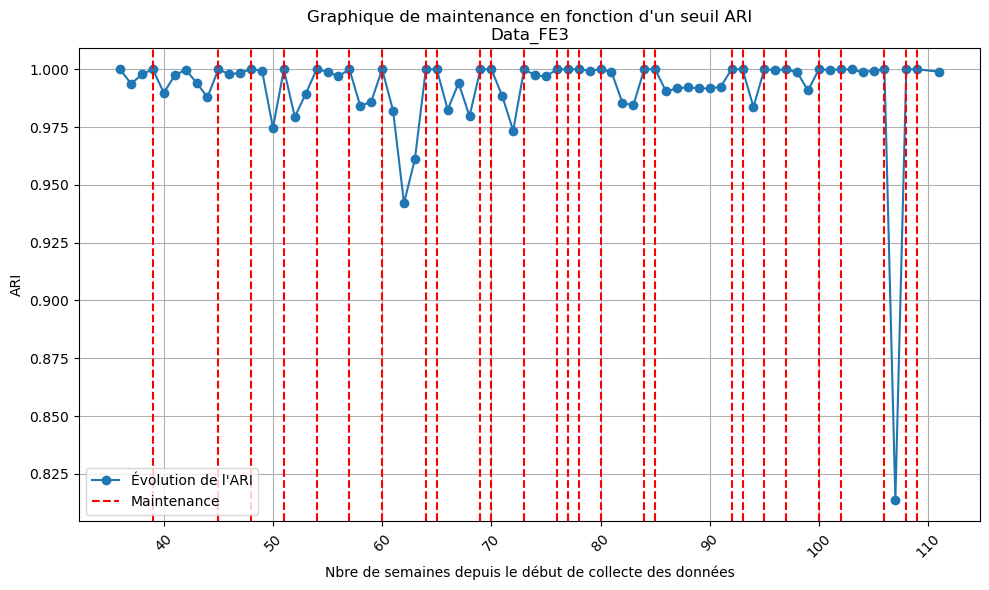


----------------------------------------------------------------------------------------------------



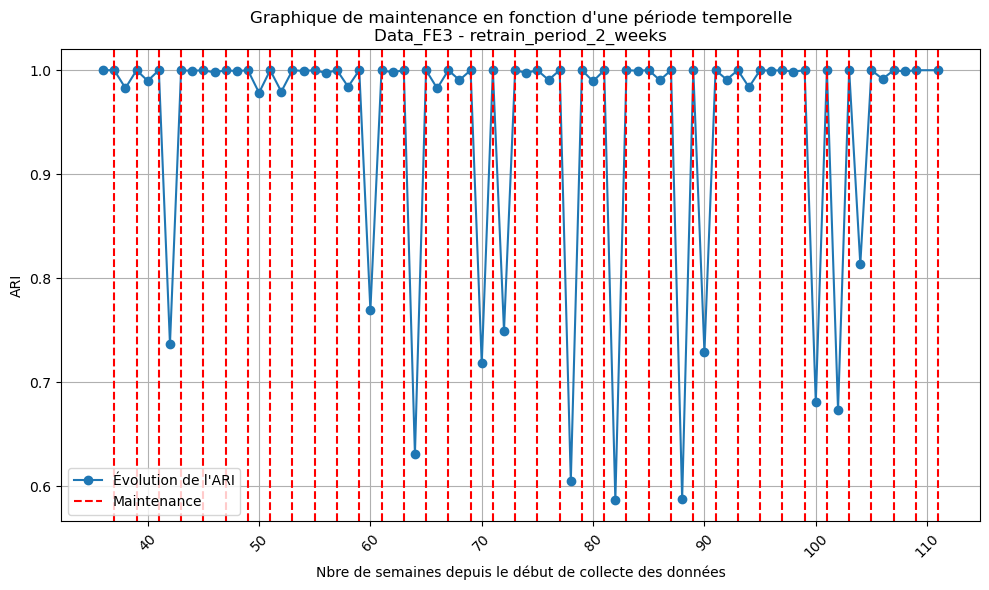

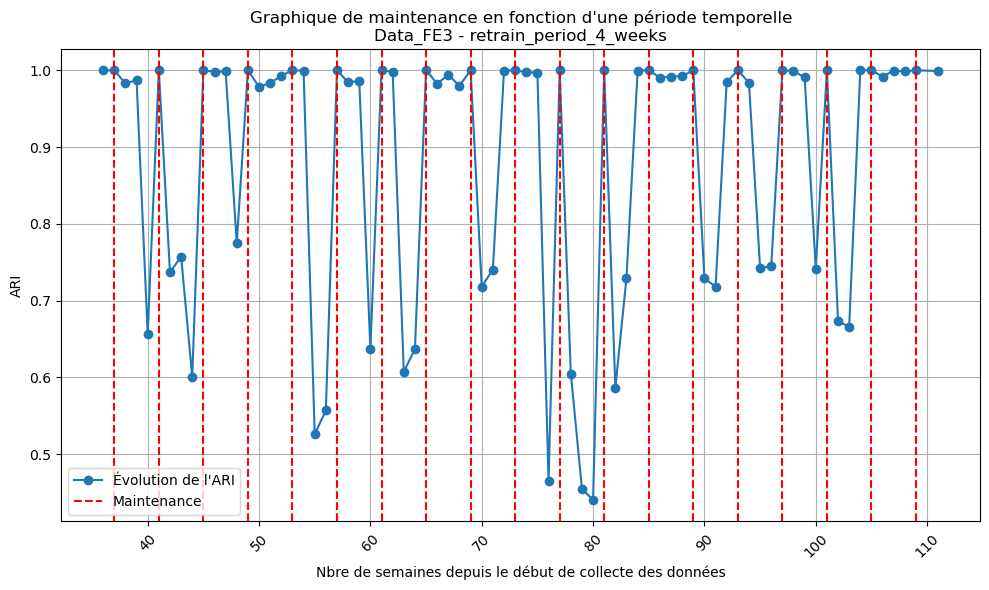

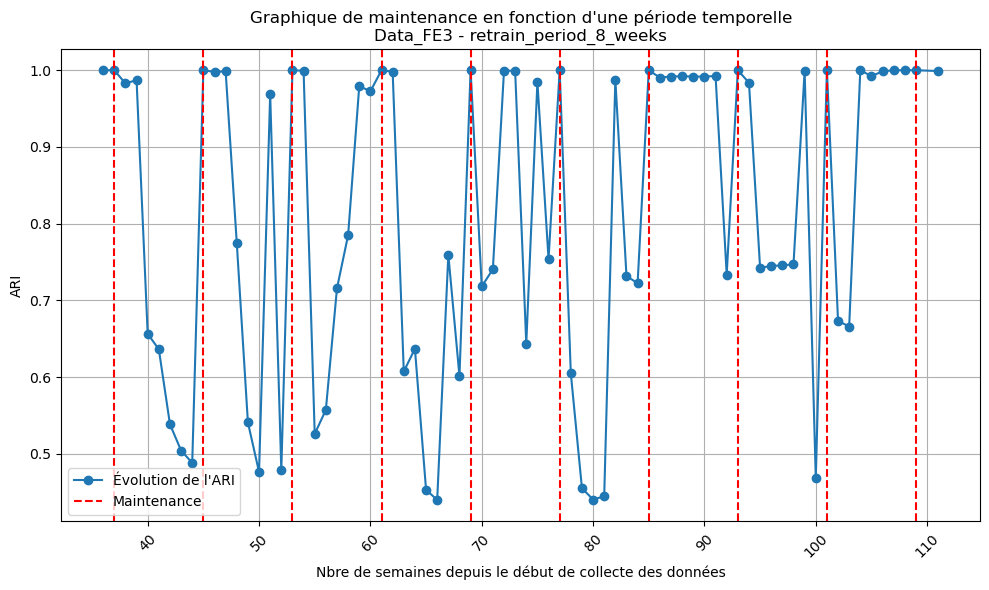

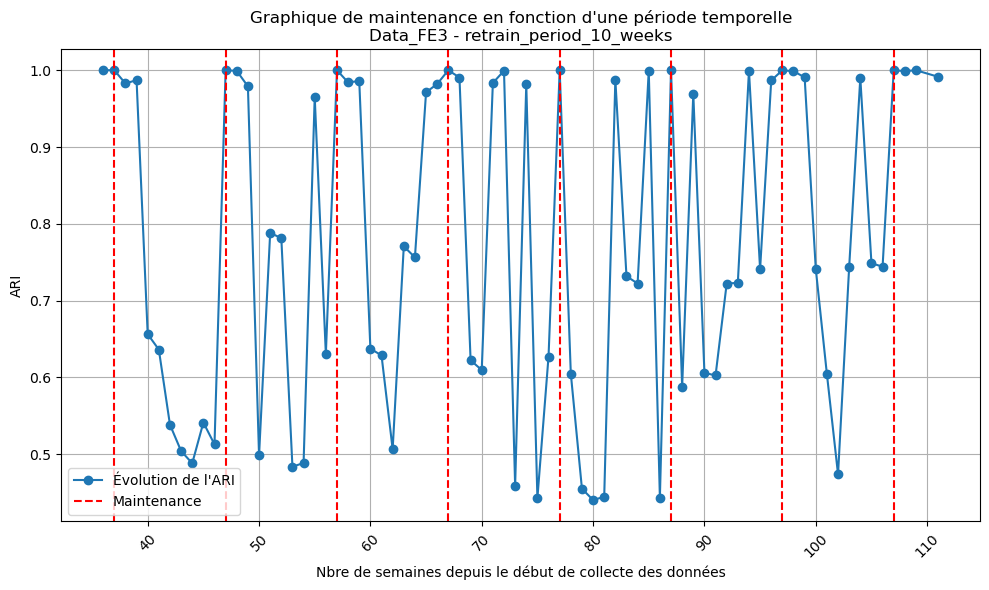

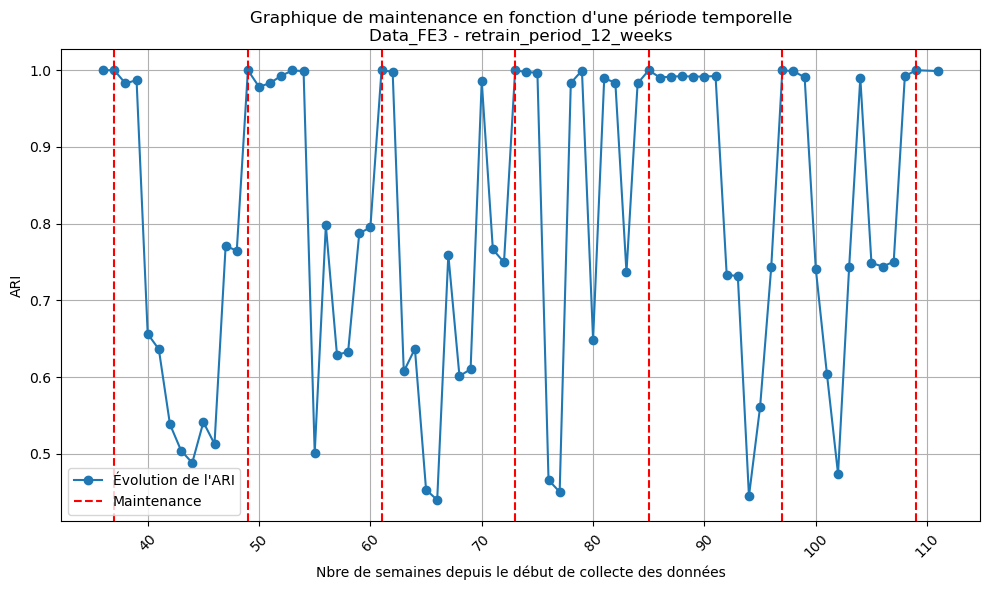

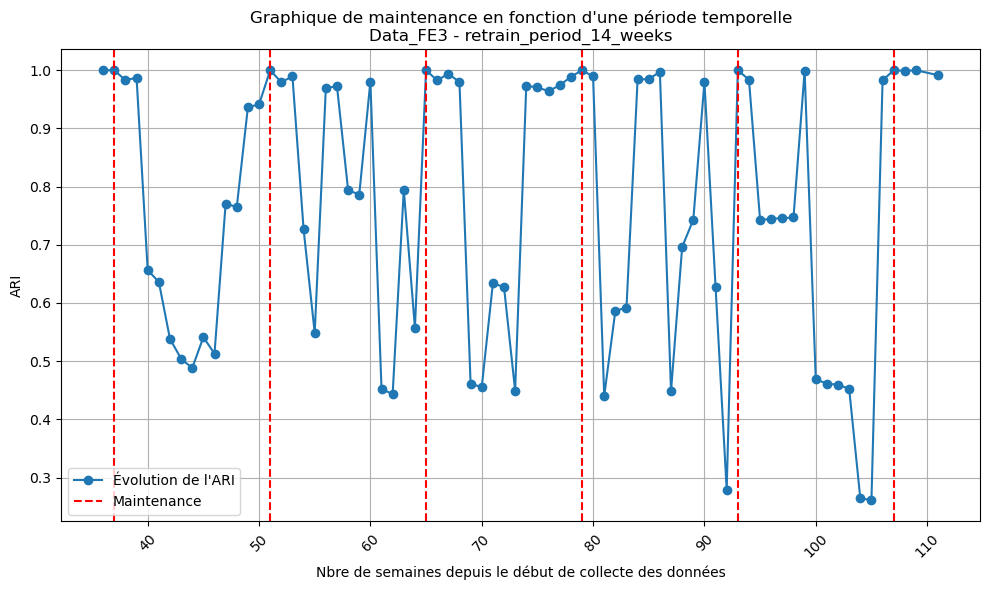

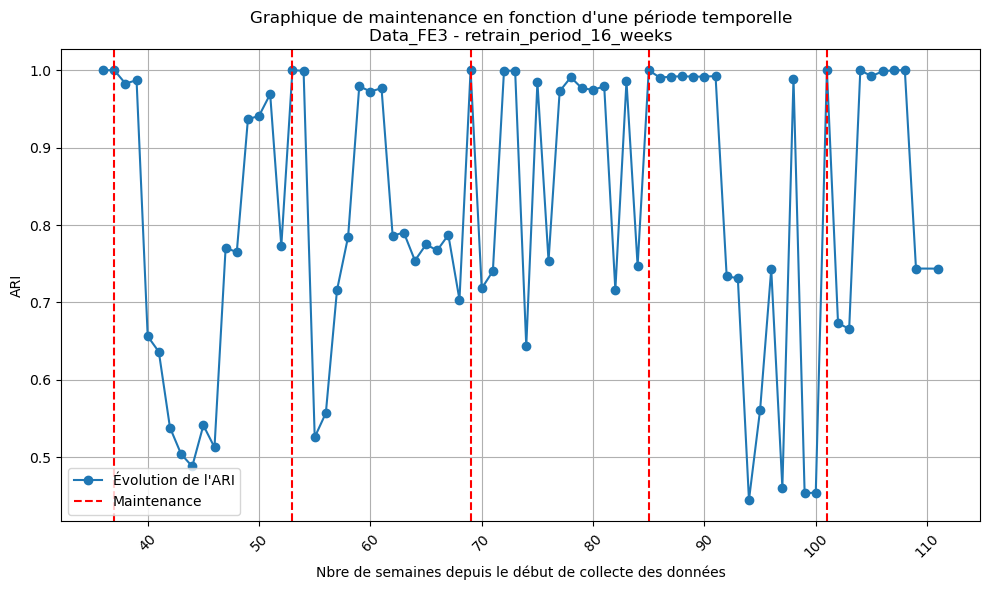


----------------------------------------------------------------------------------------------------



In [44]:
# Visualisation des résultats : 

print('--'*50)
print(f"Tracé des résultats - période d'échantillonnage hebdomadaire :")
print('--'*50+'\n')

# Graphique 1 - Evolution ARI période mensuel sans maintenance : 
fct_projet_5.visualisation_resultats_evo(
    df=resultats_evo['W']['result_df'],
    date_ref=data['order_purchase_timestamp'].min(),
    periode='W',
    title=f"Graphique de l'évolution ARI sans maintenance\nData_FE3",
)
    
print('\n'+'--'*50+'\n')

# Graphique 2 - Evolution ARI période mensuel avec maintenance seuil : 
fct_projet_5.visualisation_resultats_maintenance(
    df=resultats_maintenance_seuil['result_df'],
    maintenance_dates=resultats_maintenance_seuil['maintenance_dates'],
    date_ref=data['order_purchase_timestamp'].min(),
    periode='W',
    title="Graphique de maintenance en fonction d'un seuil ARI\nData_FE3",
)

print('\n'+'--'*50+'\n')

# Graphique 3 - Evolution ARI période mensuel avec maintenance temporelle : 
for key in resultats_maintenance_tempo.keys():
    
    fct_projet_5.visualisation_resultats_maintenance(
        df=resultats_maintenance_tempo[key]['result_df'],
        maintenance_dates=resultats_maintenance_tempo[key]['maintenance_dates'],
        date_ref=data['order_purchase_timestamp'].min(),
        periode='W',
        title=f"Graphique de maintenance en fonction d'une période temporelle\nData_FE3 - {key}",
    )
    
print('\n'+'--'*50+'\n')

del key

<u>**Observations :**</u>

En prenant une périodicité hebdomadaire, comme définit précédemment : 

- Méthode 1 : maintenance basée sur un seuil ARI : 
    - avantage : permet de limiter le nombre de maintenance a effectuer et évite une dégradation trop importante du clustering (seuil ARI à définir en fonction des besoins et attente de l'entreprise, ici seuil fixé à 0.8)
    - inconvénient : ne permet pas d'établir un contrat de maintenance à l'avance définit temporellement (cela va dépendre de la dérive des clusters en fonction des nouvelles commandes/clients de la société). 
    
- Méthode 2 : maintenance basée sur une périodicité temporelle : 
    - avantage : permet d'établir facilement une contrat de maintenance en fonction d'une périodicité. 
    - inconvénient : ne permet pas de palier à une forte dérive des clusters entre deux dates de maintenance (peut être problèmatique en fonction de l'évolution des commandes/clients de la société). 
    
    
Au vu des différentes tests de maintenance réalisé ici pour le feature engineering 3 : 
        
    --> mêmes résultats que pour le FE_2
- Proposition d'un contrat de maintenance temporelle : maintenance toutes les 2 semaines (permets un meilleur maintient de la dérive des clusters, même si des dérives importantes sont constatées due à la segmentation plus détaillée). 
- Préconisafion de la mise en place d'une maintenance par seuil ari en parallèle : prévention de toutes dérive du clustering en cas de fortes périodes de commandes ou de commandes extrêmement atypiques. 

In [45]:
# Enregistrement des dictionnaires de résultats : 

name = 'resultats_evo_FE3'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_evo, f)

name = 'resultats_maintenance_seuil_FE3'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_maintenance_seuil, f)

name = 'resultats_maintenance_tempo_FE3'
chemin_fichier = dossier_sauvegarde + '/' + name + '.pickle'
with open(chemin_fichier, 'wb') as f:
    pickle.dump(resultats_maintenance_tempo, f)

del name, chemin_fichier

In [46]:
# Suppression des données : 
del models_FE3, resultats_evo, resultats_maintenance_seuil, resultats_maintenance_tempo